In [1]:
import torch
import numpy as np
import sys

sys.path.append('human_body_prior/tools/')
from omni_tools import copy2cpu as c2c
from os import path as osp

comp_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(comp_device)

cuda


In [2]:
sys.path.append('human_body_prior/body_model/')
from body_model import BodyModel

gender = "male"

bm_fname = 'smplh_models/{}/model.npz'.format(gender)
bm = BodyModel(bm_fname=bm_fname).to(comp_device)
faces = c2c(bm.f)

In [3]:
motion_parms = {
    'root_orient': torch.zeros((1,3)).to(comp_device),
    'pose_body': torch.zeros((1,63)).to(comp_device),
    'pose_hand': torch.zeros((1,90)).to(comp_device)
}

print('Body parameter vector shapes: \n{}'.format(' \n'.join(['{}: {}'.format(k,v.shape) for k,v in motion_parms.items()])))

Body parameter vector shapes: 
root_orient: torch.Size([1, 3]) 
pose_body: torch.Size([1, 63]) 
pose_hand: torch.Size([1, 90])


In [4]:
import trimesh
sys.path.append('body_visualizer')
from tools.vis_tools import colors
from mesh.mesh_viewer import MeshViewer
from mesh.sphere import points_to_spheres
from tools.vis_tools import show_image

imw, imh=1600, 1600
mv = MeshViewer(width=imw, height=imh, use_offscreen=True)

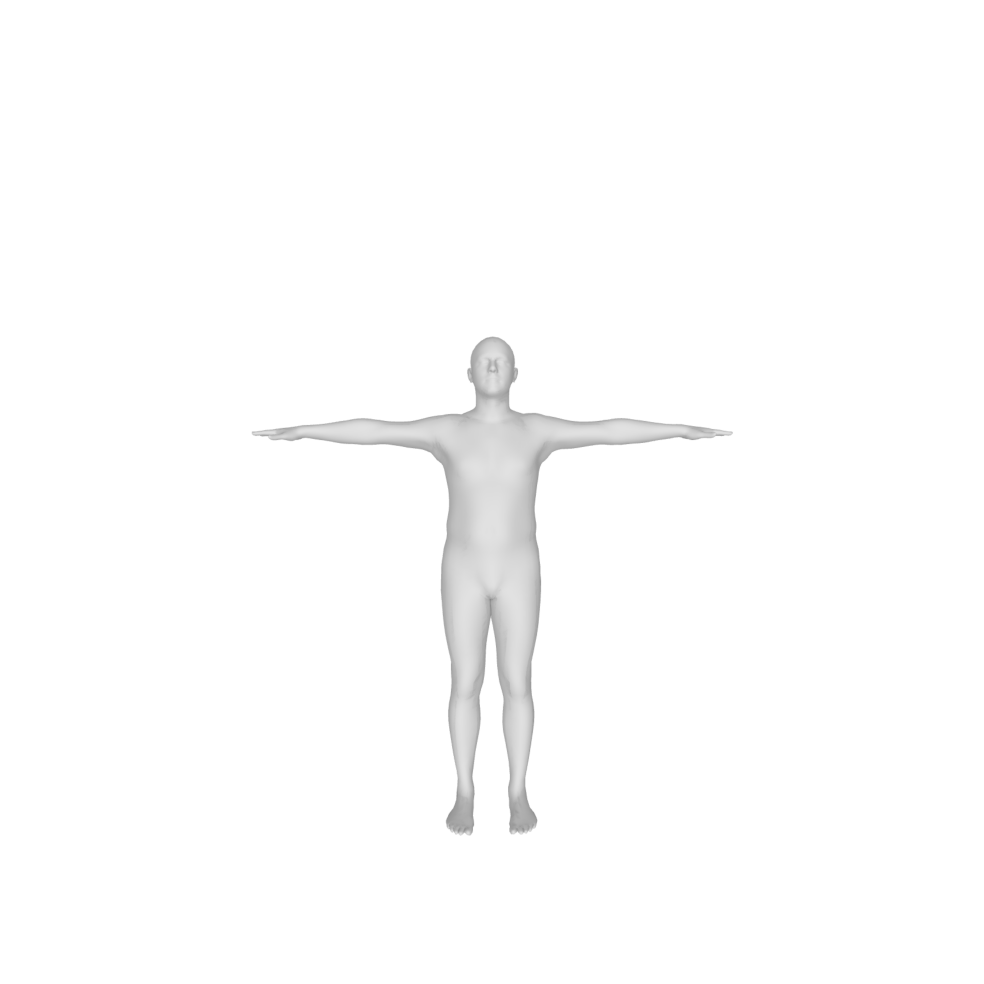

In [5]:
body_pose = bm(**{k:v for k,v in motion_parms.items() if k in ['pose_body', 'pose_hand', 'root_orient']})

def vis_body_hand_pose(fId = 0, SHOW=True):
    body_mesh = trimesh.Trimesh(vertices=c2c(body_pose.v[fId]), faces=faces, vertex_colors=np.tile(colors['grey'], (6890, 1)))
    mv.set_static_meshes([body_mesh])
    body_image = mv.render(render_wireframe=False)
    if SHOW: show_image(body_image)

    return body_image

body_image = vis_body_hand_pose(0, SHOW=True)

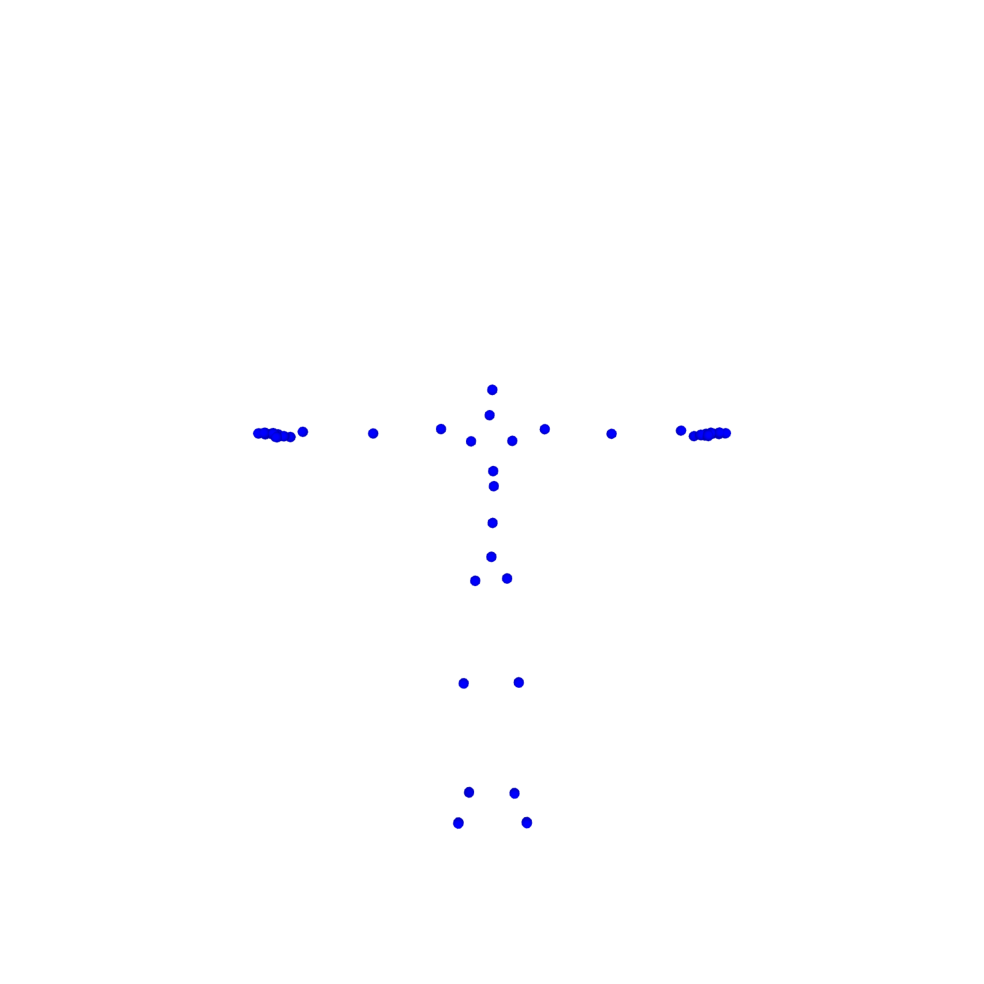

In [17]:
def vis_body_joints(fId = 0):
    joints = c2c(body_pose.Jtr[fId])
    joints_mesh = points_to_spheres(joints, point_color = colors['red'], radius=0.02)

    mv.set_static_meshes([joints_mesh])
    body_image = mv.render(render_wireframe=False)
    show_image(body_image)

vis_body_joints(fId=0)

In [28]:
array = body_pose.Jtr[0].cpu().numpy()
array = array[:,[2,0,1]]
array -= array[0,:]
array -= np.array([0,0,array[11,2]])
formatted_array = np.array2string(array, precision=3, suppress_small=True)

print(formatted_array)

[[ 0.     0.     0.956]
 [-0.018  0.059  0.874]
 [-0.014 -0.06   0.866]
 [-0.038  0.004  1.081]
 [-0.01   0.102  0.488]
 [-0.018 -0.104  0.482]
 [-0.012  0.009  1.219]
 [-0.047  0.087  0.061]
 [-0.053 -0.085  0.062]
 [-0.009  0.007  1.275]
 [ 0.075  0.128  0.   ]
 [ 0.077 -0.119  0.   ]
 [-0.042 -0.007  1.486]
 [-0.028  0.078  1.389]
 [-0.032 -0.076  1.387]
 [ 0.008  0.003  1.575]
 [-0.047  0.201  1.434]
 [-0.041 -0.19   1.434]
 [-0.07   0.457  1.418]
 [-0.072 -0.45   1.42 ]
 [-0.077  0.722  1.431]
 [-0.078 -0.719  1.426]
 [-0.055  0.828  1.42 ]
 [-0.051  0.861  1.422]
 [-0.05   0.884  1.419]
 [-0.079  0.836  1.423]
 [-0.083  0.868  1.424]
 [-0.086  0.893  1.421]
 [-0.121  0.81   1.416]
 [-0.132  0.827  1.416]
 [-0.143  0.844  1.414]
 [-0.104  0.824  1.421]
 [-0.107  0.853  1.422]
 [-0.113  0.877  1.42 ]
 [-0.048  0.765  1.408]
 [-0.022  0.783  1.411]
 [-0.006  0.805  1.409]
 [-0.052 -0.823  1.418]
 [-0.049 -0.856  1.42 ]
 [-0.05  -0.88   1.418]
 [-0.077 -0.831  1.422]
 [-0.081 -0.863 

In [54]:
SMPLH_JOINT_NAMES = [
    'pelvis',
    'left_hip',
    'right_hip',
    'spine1',
    'left_knee',
    'right_knee',
    'spine2',
    'left_ankle',
    'right_ankle',
    'spine3',
    'left_foot',
    'right_foot',
    'neck',
    'left_collar',
    'right_collar',
    'head',
    'left_shoulder',
    'right_shoulder',
    'left_elbow',
    'right_elbow',
    'left_wrist',
    'right_wrist',
    'left_index1',
    'left_index2',
    'left_index3',
    'left_middle1',
    'left_middle2',
    'left_middle3',
    'left_pinky1',
    'left_pinky2',
    'left_pinky3',
    'left_ring1',
    'left_ring2',
    'left_ring3',
    'left_thumb1',
    'left_thumb2',
    'left_thumb3',
    'right_index1',
    'right_index2',
    'right_index3',
    'right_middle1',
    'right_middle2',
    'right_middle3',
    'right_pinky1',
    'right_pinky2',
    'right_pinky3',
    'right_ring1',
    'right_ring2',
    'right_ring3',
    'right_thumb1',
    'right_thumb2',
    'right_thumb3']

print(len(SMPLH_JOINT_NAMES))

52


In [61]:
kintree = np.load(bm_fname)['kintree_table']

for i in range(1,52):
    dist = array[kintree[1][i],:] - array[kintree[0][i],:]
    print(SMPLH_JOINT_NAMES[i], "[%f %f %f]" % (dist[0], dist[1], dist[2])) 

left_hip [-0.017664 0.058581 -0.082280]
right_hip [-0.013543 -0.060310 -0.090513]
spine1 [-0.038385 0.004439 0.124404]
left_knee [0.008037 0.043451 -0.386469]
right_knee [-0.004843 -0.043257 -0.383688]
spine2 [0.026820 0.004488 0.137956]
left_ankle [-0.037428 -0.014790 -0.426874]
right_ankle [-0.034562 0.019056 -0.420046]
spine3 [0.002855 -0.002265 0.056032]
left_foot [0.122042 0.041054 -0.060286]
right_foot [0.130323 -0.034840 -0.062106]
neck [-0.033468 -0.013390 0.211635]
left_collar [-0.018898 0.071702 0.114000]
right_collar [-0.023707 -0.082954 0.112472]
head [0.050410 0.010113 0.088937]
left_shoulder [-0.019046 0.122921 0.045205]
right_shoulder [-0.008472 -0.113228 0.046853]
left_elbow [-0.022946 0.255332 -0.015649]
right_elbow [-0.031269 -0.260127 -0.014369]
left_wrist [-0.007375 0.265709 0.012698]
right_wrist [-0.006027 -0.269108 0.006794]
left_index1 [0.022139 0.105872 -0.011025]
left_index2 [0.003812 0.033049 0.001728]
left_index3 [0.000825 0.023241 -0.002789]
left_middle1 [-0